<a href="https://colab.research.google.com/github/deepinmachine/classification-of-customers/blob/main/Whether_a_person_will_by_health_insurance_or_not.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Problem statement***

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company. An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee. For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import MinMaxScaler

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [4]:
from sklearn.ensemble import RandomForestClassifier

In [5]:
import xgboost as xgb

In [6]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [46]:
from sklearn.metrics import roc_curve, roc_auc_score

In [7]:
path='/content/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv'
df=pd.read_csv(path)

In [8]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


**Explaining the data**


1.   Id -Uniqe id of each customer
2.   Gender - Male or Female
3.   Age - age of customer
4. Driving license- whether customer have DL or not
5. Region- particular code for rach region
6. Previously_Insured- yes or no
7. Vehicle_Age -Age of vehicle
8. Vehicle_Damage- Past damages present or not
9. Annual_Premium- The amount customer needs to pay as premium
10. Policy_Sales_Channel - Channel used to outreaching the customer
11. Vintage- Number of days customer has been associated with the company
12. Response- Customer is interested or not




This is a  Supervised classification problem where we have to do binary classification whether a customer will be interestd in buy a insurance or not.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


There is 1 null value present only.

Vehicle age must be a float value.

Vehicle damage is binary value.

In [10]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


Annual premium seems to have some outliers.

Response mean very low this signify that numbers of 0 are high.

Almost everyone in our data have a driving license

In [11]:
df['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

This is not a balanced data percentage of 1 is very low compared to zero.

So, The use Ensemble techiniques like Random forest, Gradients Boosting can help us . and abount selecetion of algorithm we could use Decision trees and Random forest.

I can also use RandomSampler in case of logistic regression as it the algorithm that i want to use currently.

In [12]:
df=df.dropna()

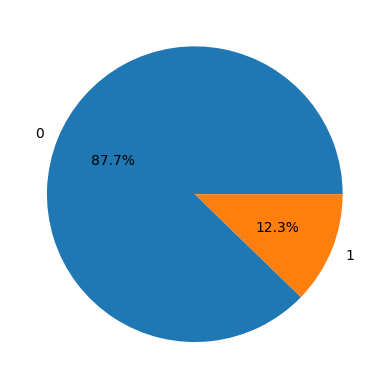

In [13]:
response=df['Response'].value_counts()
plt.pie(response,labels=response.index,autopct='%1.1f%%')
plt.show()

In [14]:
df['Vehicle_Age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

Vehicle age will surely affect the response of the customer, so we will replace the value

In [15]:
replace_map={'> 2 Years':2.5,'1-2 Year':1.5,'< 1 Year':0.5}
df['Vehicle_Age']=df['Vehicle_Age'].replace(replace_map)

In [16]:
df['Vehicle_Damage']=df['Vehicle_Damage'].replace({'Yes':1,'No':0})

<ipython-input-17-426c1ec26ccb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt='.2f')


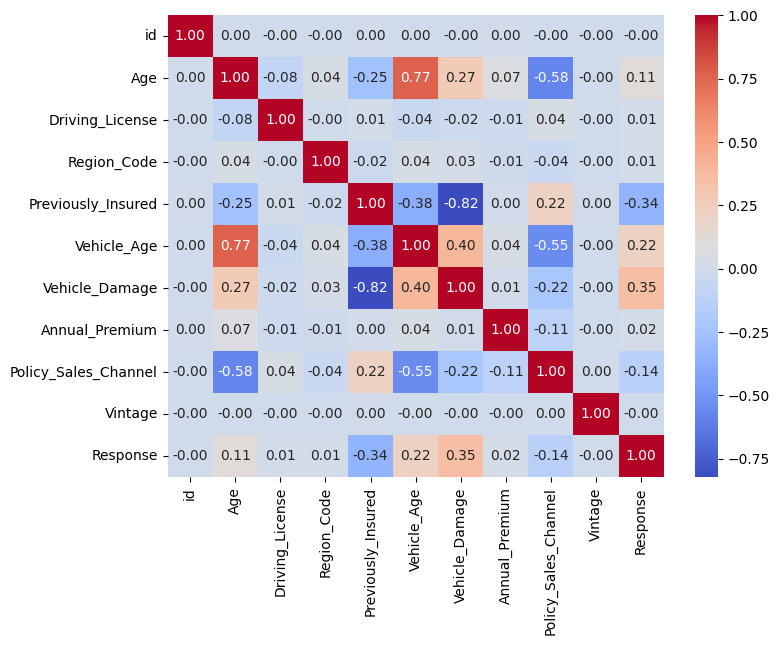

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.show()

In [18]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [19]:
df1 = df[{'Age', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Response'}]

<ipython-input-19-12e1b394ebfd>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df1 = df[{'Age', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Response'}]


In [20]:
df1.head()

,Previously_Insured,Response,Vehicle_Damage,Vehicle_Age,Age
0,0,1,1,2.5,44
1,0,0,0,1.5,76
2,0,1,1,2.5,47
3,1,0,0,0.5,21
4,1,0,0,0.5,29


In [21]:
min_max=MinMaxScaler()
df1['Age']=min_max.fit_transform(df1[['Age']])

<ipython-input-21-2b43bf96023b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Age']=min_max.fit_transform(df1[['Age']])


In [22]:
df11=df1[df1['Response']==1]
df12=df1[df1['Response']==0].iloc[0:100000,:]

In [23]:
df2=pd.concat([df11,df12],ignore_index=True)
df2=df2.sample(frac=1).reset_index(drop=True)

Our data was highly imbalanced but for sake of learning i am implement normal logistic regression.
##Logistic Regression

In [24]:
x=df2[['Age', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage']]
y=df2['Response']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=12,stratify=y)

In [25]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [26]:
y_pred=lr.predict(x_test)

In [27]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.7586018866895686


In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.78      0.81     25000
           1       0.60      0.72      0.65     11678

    accuracy                           0.76     36678
   macro avg       0.73      0.75      0.73     36678
weighted avg       0.77      0.76      0.76     36678



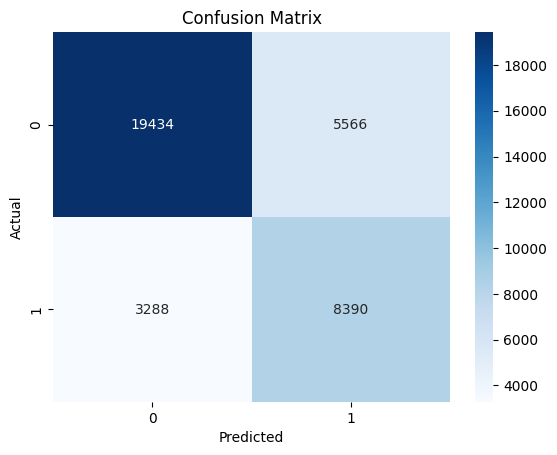

In [29]:
cm=confusion_matrix(y_test,y_pred)
# labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

As our data was highly imbalanced so it predicting everything as 0's

##Random forest classifier

In [30]:
rf=RandomForestClassifier(n_estimators=1000, random_state=12)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000, random_state=12)

In [31]:
y_pred1=rf.predict(x_test)

In [32]:
# accuracy = accuracy_score(y_test, predictions)
print(accuracy_score(y_test,y_pred1))

0.765636076121926


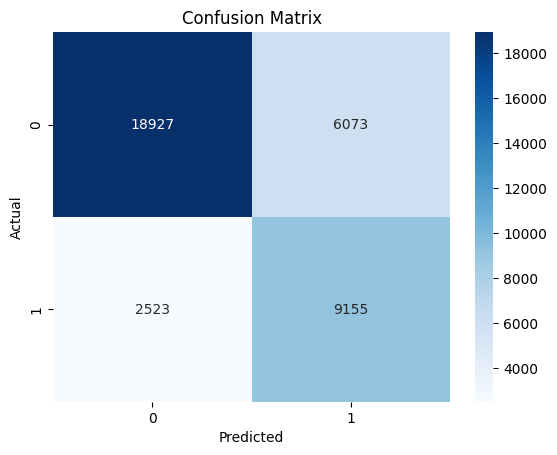

In [33]:
cm=confusion_matrix(y_test,y_pred1)
# labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

still imbalanced data is creating problem even after getting very high number of n_estimator there is just betterment in model

Now we will try to use boosting as bagging in random_forest and logistic regresssion both did not work we will use bootsing on logistic regression.

In [34]:
params = {
    'objective': 'binary:logistic',
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100
}
model=xgb.XGBClassifier(**params)
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [35]:
y_pred2=model.predict(x_test)

In [36]:
print(accuracy_score(y_test,y_pred2))

0.7656088118218005


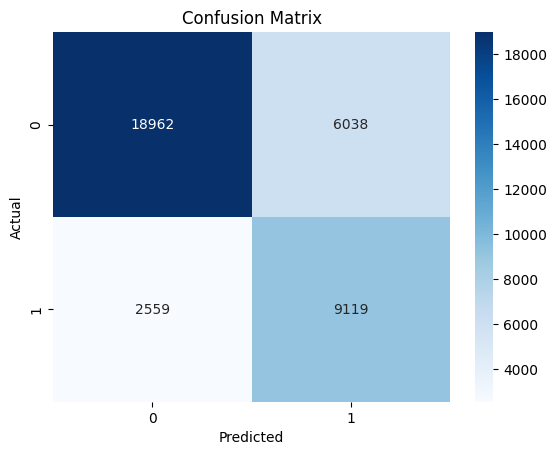

In [37]:
cm=confusion_matrix(y_test,y_pred2)
# labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Best model seems to be XGBoost with logistic regression for now and there is a very low difference but for now i will also try to AUC and roc and other metrices to get the better idea that which model is best.

In [47]:
#ROC curve is a graph between false positive rate and true positive rate where it maps the fpr and tpr for every probability thresold
y_prob=model.predict_proba(x_test)

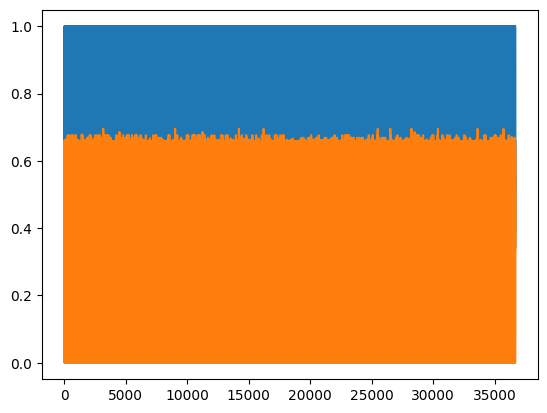

In [48]:
plt.plot(y_prob)

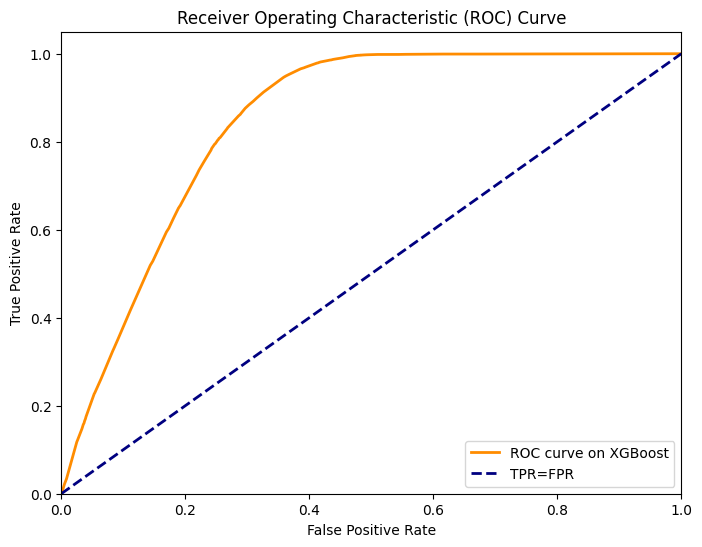

In [53]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])  # y_pred[:, 1] contains probabilities of the positive class
# roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve on XGBoost')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',label='TPR=FPR')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [52]:
print(roc_auc_score(y_test, y_prob[:,1]))

0.8448207175886282


The AUC value ranges between 0 and 1, where:

1. AUC = 0.5 implies that the model has no discrimination ability (equivalent to random guessing).
2. AUC > 0.5 indicates that the model is better than random guessing.
3. AUC = 1 means the model has perfect discrimination.


So, an AUC of 0.844 suggests that our model has strong discriminatory power and performs well in distinguishing between the positive and negative classes.